In [21]:
# [이 셀은 무엇을 하는가?]
# - 분석에 필요한 라이브러리를 불러오고
# - 데이터 파일을 읽어온 뒤
# - 기본 구조(행/열/타입)를 즉시 점검합니다.

import pandas as pd                 # 표 형태 데이터 처리
import numpy as np                  # 수치 계산/배열 처리
import matplotlib.pyplot as plt     # 기본 시각화
import seaborn as sns               # 통계 시각화

In [22]:
# 보기 좋은 출력(선택)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

In [23]:
# 1) CSV 로드 (경로는 환경에 맞게 수정)
titanic = pd.read_csv("titan.csv")

In [24]:
# 2) 기본 구조 확인
print("shape:", titanic.shape)      # (행, 열)
display(titanic.head(3))            # 상위 몇 행 보기
print("\n[dtypes]")
print(titanic.dtypes)

shape: (1309, 28)


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2.0,0,0,1



[dtypes]
Passengerid      int64
Age            float64
Fare           float64
Sex              int64
sibsp            int64
zero             int64
zero.1           int64
zero.2           int64
zero.3           int64
zero.4           int64
zero.5           int64
zero.6           int64
Parch            int64
zero.7           int64
zero.8           int64
zero.9           int64
zero.10          int64
zero.11          int64
zero.12          int64
zero.13          int64
zero.14          int64
Pclass           int64
zero.15          int64
zero.16          int64
Embarked       float64
zero.17          int64
zero.18          int64
2urvived         int64
dtype: object


In [25]:
# [이 셀은 무엇을 하는가?]
# - 결측값/중복값을 '먼저' 파악하고
# - dropna로 날려도 되는지 판단 근거를 만듭니다.

# 1) 결측값 개수와 비율
na_cnt = titanic.isna().sum()
na_ratio = (titanic.isna().mean() * 100).round(2)
quality = pd.DataFrame({"na_cnt": na_cnt, "na_ratio(%)": na_ratio}).sort_values("na_cnt", ascending=False)

display(quality)

,na_cnt,na_ratio(%)
Embarked,2,0.15
Passengerid,0,0.00
Age,0,0.00
zero.18,0,0.00
zero.17,0,0.00
zero.16,0,0.00
zero.15,0,0.00
Pclass,0,0.00
zero.14,0,0.00
zero.13,0,0.00


In [26]:
# 2) 중복 행 확인(완전 동일 행)
dup_cnt = titanic.duplicated().sum()
print("완전 중복 행 수:", dup_cnt)

완전 중복 행 수: 0


In [27]:
#나이별 구분 및 각 나이별 생존율 확인 하기
titanic['Age_cat'] = pd.cut(titanic['Age'],bins=[0,3,7,15,30,60,100],include_lowest=True,labels=['baby','children','teenage','young','adult','old'])

#연령대를 기준으로 평균 값을 구해 볼수 있어요!
titanic.groupby('Age_cat').mean()

C:\Users\blood\AppData\Local\Temp\ipykernel_32332\2794504320.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('Age_cat').mean()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,zero.5,zero.6,Parch,zero.7,zero.8,zero.9,zero.10,zero.11,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
Age_cat,,,,,,,,,,,,,,,,,,,,,,,,,,,,
baby,599.121951,1.540732,29.615346,0.463415,1.487805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.365854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.585366,0.0,0.0,1.634146,0.0,0.0,0.487805
children,599.960000,5.160000,31.022828,0.480000,1.760000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.360000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.640000,0.0,0.0,1.520000,0.0,0.0,0.560000
teenage,648.448980,11.540816,38.390904,0.510204,1.734694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.163265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.632653,0.0,0.0,1.448980,0.0,0.0,0.306122
young,658.208719,24.991413,24.710997,0.339498,0.397622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.239102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.492734,0.0,0.0,1.491413,0.0,0.0,0.223250
adult,660.774752,41.548267,47.141986,0.361386,0.376238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.405941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.893564,0.0,0.0,1.483871,0.0,0.0,0.294554
old,631.545455,65.393939,58.860609,0.212121,0.303030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.545455,0.0,0.0,1.500000,0.0,0.0,0.151515


In [28]:
# [이 셀은 무엇을 하는가?]
# - dropna()를 쓰지 않고
# - Age 결측은 중앙값으로 보정(단순/강의용)
# - 범주형 결측은 'Unknown'으로 채웁니다.
# - 분석용 데이터셋 df를 따로 만들어 원본을 보존합니다.

df = titanic.copy()

# 1) Age가 존재하는지 확인(없으면 KeyError 방지)
if "Age" in df.columns:
    # 중앙값으로 대체(강의용 기본)
    age_median = df["Age"].median()
    df["Age"] = df["Age"].fillna(age_median)
    print("Age 결측 -> 중앙값 대체:", age_median)

Age 결측 -> 중앙값 대체: 28.0


In [29]:
# 2) 범주형 컬럼(문자열)에서 결측은 Unknown으로 대체
obj_cols = df.select_dtypes(include=["object"]).columns
for c in obj_cols:
    df[c] = df[c].fillna("Unknown")

In [30]:
# 3) (선택) 여전히 결측이 남는지 확인
print("결측 총합(처리 후):", int(df.isna().sum().sum()))

결측 총합(처리 후): 2


In [31]:
# [이 셀은 무엇을 하는가?]
# - describe()를 숫자/범주형으로 나눠 해석 가능한 형태로 확인합니다.

display(df.describe(include=[np.number]).T)     # 숫자 요약
display(df.describe(include=["object"]).T)      # 범주형 요약

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
zero,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.1,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.2,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.3,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000
zero.4,1309.0,0.000000,0.000000,0.00,0.0000,0.0000,0.000,0.0000


ValueError: No objects to concatenate

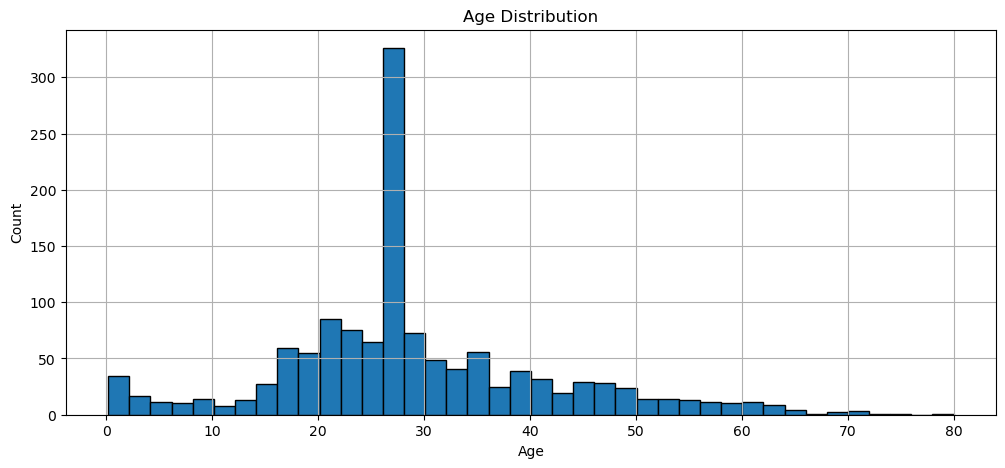

Age min/max: 0.17 80.0


In [32]:
# [이 셀은 무엇을 하는가?]
# - Age 분포를 시각화해
# - 극단값/치우침/구간 정의의 근거를 만듭니다.

plt.figure(figsize=(12,5))
plt.hist(df["Age"], bins=40, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# 이상치(너무 큰 나이) 점검
print("Age min/max:", df["Age"].min(), df["Age"].max())

In [33]:
# [이 셀은 무엇을 하는가?]
# - Age를 연령대 범주로 바꾸고(Age_cat)
# - 각 구간의 샘플 수가 충분한지 확인합니다.

bins = [0, 3, 7, 15, 30, 60, 100]
labels = ["baby", "children", "teenage", "young", "adult", "old"]

df["Age_cat"] = pd.cut(
    df["Age"],
    bins=bins,
    include_lowest=True,
    labels=labels
)

# 구간별 샘플 수(표본 부족 구간이 있으면 해석 위험)
display(df["Age_cat"].value_counts(dropna=False).sort_index())

Age_cat
baby         41
children     25
teenage      49
young       757
adult       404
old          33
Name: count, dtype: int64

In [34]:
# [이 셀은 무엇을 하는가?]
# - Age_cat별 생존율(평균)을 계산합니다.
# - groupby.mean()을 그대로 쓰면 불필요한 평균이 섞이므로
#   'Survived'만 명시해서 분석 목적을 고정합니다.

# 1) 생존 컬럼명 확인 (실무: 파일마다 컬럼명이 다를 수 있음)
print("columns:", df.columns.tolist())

# 2) 보통 Survived가 생존(0/1)
target_col = "2urvived"
if target_col not in df.columns:
    raise KeyError("Survived 컬럼이 없습니다. CSV 컬럼명을 확인하세요.")

# 3) 연령대별 생존율(0/1 평균 = 생존 확률)
age_survival = df.groupby("Age_cat")[target_col].mean().sort_index()
display(age_survival)

columns: ['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived', 'Age_cat']


C:\Users\blood\AppData\Local\Temp\ipykernel_32332\4262968744.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby("Age_cat")[target_col].mean().sort_index()


Age_cat
baby        0.487805
children    0.560000
teenage     0.306122
young       0.223250
adult       0.294554
old         0.151515
Name: 2urvived, dtype: float64

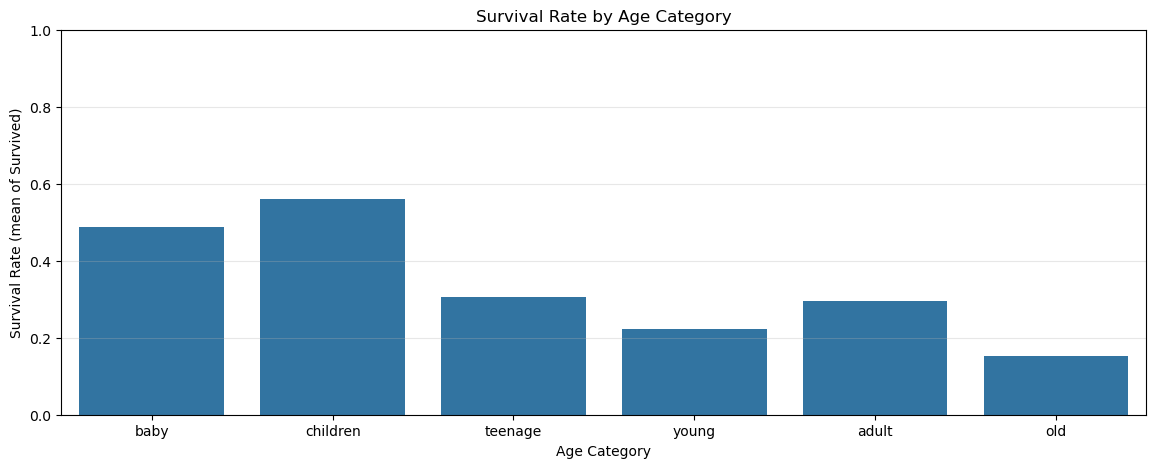

Age_cat
baby         41
children     25
teenage      49
young       757
adult       404
old          33
Name: n, dtype: int64

In [35]:
# [이 셀은 무엇을 하는가?]
# - Age_cat별 생존율을 막대 그래프로 그립니다.
# - 동시에 표본 수(n)도 출력해서 해석의 신뢰도를 확보합니다.

plt.figure(figsize=(14,5))

# 1) barplot (오타 수정: y='Survived')
sns.barplot(x="Age_cat", y="2urvived", data=df, errorbar=None)

plt.title("Survival Rate by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Survival Rate (mean of Survived)")
plt.ylim(0, 1)
plt.grid(axis="y", alpha=0.3)
plt.show()

# 2) 구간별 표본 수 같이 확인(해석 필수)
counts = df["Age_cat"].value_counts().sort_index()
display(counts.rename("n"))

Sex,0,1
Age_cat,,
baby,0.590909,0.368421
children,0.230769,0.916667
teenage,0.208333,0.400000
young,0.094000,0.474708
adult,0.151163,0.547945
old,0.076923,0.428571


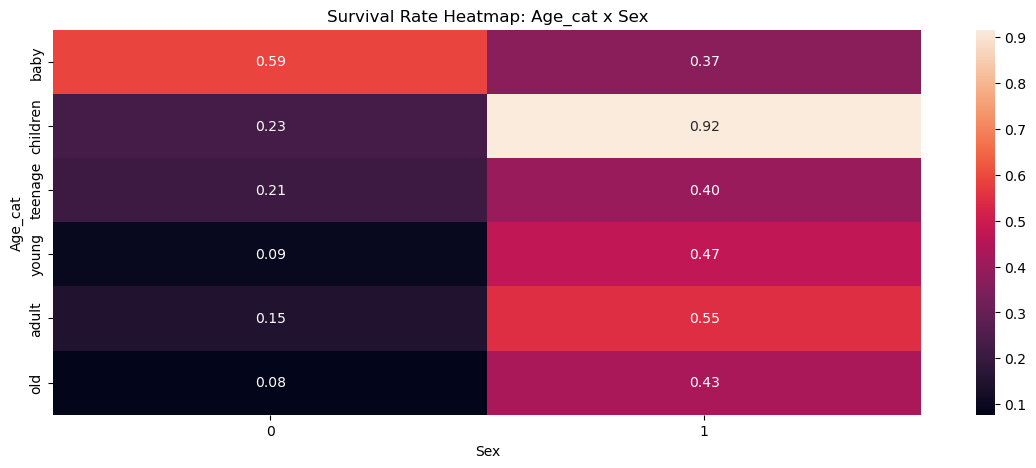

In [36]:
# [이 셀은 무엇을 하는가?]
# - Age_cat만 보면 숨겨진 변수가 있을 수 있으므로
# - 성별(Sex)이 존재한다면 Age_cat × Sex로 생존율을 비교합니다.

if "Sex" in df.columns:
    pivot = df.pivot_table(
        index="Age_cat",
        columns="Sex",
        values="2urvived",
        aggfunc="mean"
    )
    display(pivot)

    plt.figure(figsize=(14,5))
    sns.heatmap(pivot, annot=True, fmt=".2f")
    plt.title("Survival Rate Heatmap: Age_cat x Sex")
    plt.show()
else:
    print("Sex 컬럼이 없어서 확장 분석을 생략합니다.")

In [37]:
# [이 셀은 무엇을 하는가?]
# - 컬럼명이 제각각(대소문자/공백/특수문자/오타)이라 분석이 힘든 상태를
#   "표준 규칙"으로 한 번에 정리합니다.
# - 예: Passengerid -> PassengerId / Survived 오타 -> Survived
# - 예: zero.18 같은 불필요/의미불명 컬럼을 패턴으로 찾아 정리(삭제 후보)합니다.

import re
import pandas as pd

# 0) 현재 컬럼명 빠르게 확인
print("원본 컬럼 수:", len(titanic.columns))
print(titanic.columns.tolist())

# 1) 컬럼명 표준화 함수: 공백/특수문자 정리 → snake_case 스타일로 통일
def normalize_colname(col: str) -> str:
    col = str(col).strip()                          # 앞뒤 공백 제거
    col = col.replace("\n", " ").replace("\t", " ") # 숨은 개행/탭 제거
    col = re.sub(r"\s+", "_", col)                  # 연속 공백 -> _
    col = col.replace(".", "_")                     # 점(.) -> _
    col = re.sub(r"[^0-9a-zA-Z_]+", "", col)         # 영숫자/_ 외 제거
    col = re.sub(r"_+", "_", col)                   # __ -> _
    col = col.strip("_")                            # 양끝 _ 제거
    return col

# 2) 1차 정리: 모든 컬럼명에 표준화 규칙 적용
df = titanic.copy()
old_cols = df.columns.tolist()
df.columns = [normalize_colname(c) for c in df.columns]

print("\n[표준화 후 컬럼]")
print(df.columns.tolist())

# 3) survived 관련 오타 자동 교정
# - survived, 2urvived, Survived 등 어떤 형태든 "Survived"로 맞추는 전략
# - 먼저 후보를 찾고(존재하는 컬럼만), 있으면 rename
candidate_map = {
    "survived": "Survived",
    "Survived": "Survived",
    "2urvived": "Survived",
    "survival": "Survived",
    "Survive": "Survived",
    "survive": "Survived",
}

# 실제로 존재하는 컬럼만 골라서 rename 적용
rename_dict = {}
for c in df.columns:
    key = c  # 표준화된 이름 기준
    # 대소문자 무시 매칭을 위해 lower 비교
    if key.lower() in candidate_map:
        rename_dict[key] = "Survived"

# rename 실행(중복 rename 안전)
if rename_dict:
    df = df.rename(columns=rename_dict)

# rename 결과 확인
print("\n[Survived 정리 후 컬럼 체크]")
print([c for c in df.columns if "Surv" in c or "surv" in c])

# 4) PassengerId / Passengerid 같은 케이스 정리(표준화 후에는 passengerid로 될 가능성)
# - 표준화로 Passengerid -> Passengerid 또는 passengerid가 되었을 수 있음
# - 분석 친화적으로 PassengerId로 "보기 좋은" 이름으로 맞추고 싶다면 아래처럼
if "Passengerid" in df.columns:
    df = df.rename(columns={"Passengerid": "PassengerId"})
if "passengerid" in df.columns:
    df = df.rename(columns={"passengerid": "PassengerId"})

# 5) zero_18 같은 의미불명 컬럼 자동 탐지
# - "zero_숫자" 패턴은 대개 전처리 산물/더미/쓰레기 컬럼인 경우가 많음
zero_like_cols = [c for c in df.columns if re.fullmatch(r"zero_\d+", c)]

print("\nzero_* 형태 컬럼 개수:", len(zero_like_cols))
print("예시 10개:", zero_like_cols[:10])

# 6) 필요하다면 제거(삭제는 돌이킬 수 없으니, 먼저 후보만 확인한 뒤 제거 권장)
# - 실무 팁: 삭제 전 항상 shape 비교
before_shape = df.shape
df_clean = df.drop(columns=zero_like_cols)  # zero_* 컬럼 제거
after_shape = df_clean.shape

print("\nshape 변화:", before_shape, "->", after_shape)

# 7) 최종 결과를 다음 셀에서 쓰기 위해 df_clean을 메인 데이터로 사용
titanic = df_clean

# 8) 마지막 점검
print("\n[최종 컬럼 수]:", len(titanic.columns))
print("Survived 존재 여부:", "Survived" in titanic.columns)
display(titanic.head(3))


원본 컬럼 수: 29
['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17', 'zero.18', '2urvived', 'Age_cat']

[표준화 후 컬럼]
['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero_1', 'zero_2', 'zero_3', 'zero_4', 'zero_5', 'zero_6', 'Parch', 'zero_7', 'zero_8', 'zero_9', 'zero_10', 'zero_11', 'zero_12', 'zero_13', 'zero_14', 'Pclass', 'zero_15', 'zero_16', 'Embarked', 'zero_17', 'zero_18', '2urvived', 'Age_cat']

[Survived 정리 후 컬럼 체크]
['Survived']

zero_* 형태 컬럼 개수: 18
예시 10개: ['zero_1', 'zero_2', 'zero_3', 'zero_4', 'zero_5', 'zero_6', 'zero_7', 'zero_8', 'zero_9', 'zero_10']

shape 변화: (1309, 29) -> (1309, 11)

[최종 컬럼 수]: 11
Survived 존재 여부: True


,PassengerId,Age,Fare,Sex,sibsp,zero,Parch,Pclass,Embarked,Survived,Age_cat
0,1,22.0,7.2500,0,1,0,0,3,2.0,0,young
1,2,38.0,71.2833,1,1,0,0,1,0.0,1,adult
2,3,26.0,7.9250,1,0,0,0,3,2.0,1,young


In [38]:
# [이 셀은 무엇을 하는가?]
# - 컬럼 표준화 이후 "중복 컬럼명"이 생겼는지 검사하고
# - 중복이 있으면 _dup1, _dup2 처럼 자동으로 이름을 붙여 충돌을 방지합니다.

from collections import Counter

cols = titanic.columns.tolist()
cnt = Counter(cols)
dups = [c for c, k in cnt.items() if k > 1]

print("중복 컬럼명:", dups)

if dups:
    new_cols = []
    seen = {}
    for c in cols:
        if c not in seen:
            seen[c] = 0
            new_cols.append(c)
        else:
            seen[c] += 1
            new_cols.append(f"{c}_dup{seen[c]}")
    titanic.columns = new_cols
    print("중복 처리 완료!")
    print(titanic.columns.tolist())


중복 컬럼명: []
